In [12]:
# Import library yang diperlukan
import pandas as pd
import numpy as np

# Load dataset
file_path = r'C:\Users\asus\Documents\Kuliah\Semester 5\Kecerdasan Buatan\ecommerce_jacket\e_commerce_winter_jacket_data_2024.csv'

data = pd.read_csv(file_path)

# Tampilkan beberapa baris pertama dataset untuk melihat struktur data
data.head()


,title,type,priceWithCurrency,lastUpdated,availableText,itemLocation
0,XIYUER Women's down jacket Short 90% duck down...,Coat,US $229.00,"Oct 16, 2024 09:26:58 PDT",10 available,NaN
1,Reebok Men's Softshell Jacket,NaN,US $40.00,NaN,5 available,"Hurst, Texas, United States"
2,Mens Fleece Jacket Soft Plush Zip Up Fall Wint...,Jacket,US $14.99/ea,"Oct 16, 2024 12:16:32 PDT",4 available,"Alviso, California, United States"
3,Men's Casual Padded Jacket Winter Warm Hooded ...,Jacket,US $35.83/ea,"Oct 17, 2024 18:11:06 PDT",3 available30 sold,NaN
4,Men's Casual Padded Jacket Winter Warm Hooded ...,Jacket,US $35.83,NaN,Last one8 sold,NaN


In [13]:
# Menghapus baris atau kolom yang tidak relevan
data.dropna(subset=['priceWithCurrency', 'availableText'], inplace=True)

# Ekstraksi harga dalam bentuk numerik
data['price'] = data['priceWithCurrency'].str.extract(r'(\d+\.\d+)').astype(float)

# Ekstraksi stok dari kolom 'availableText'
data['available_stock'] = data['availableText'].str.extract(r'(\d+)').astype(float)

# Tampilkan hasil setelah preprocessing
data[['title', 'type', 'price', 'available_stock', 'itemLocation']].head()


,title,type,price,available_stock,itemLocation
0,XIYUER Women's down jacket Short 90% duck down...,Coat,229.00,10.0,NaN
1,Reebok Men's Softshell Jacket,NaN,40.00,5.0,"Hurst, Texas, United States"
2,Mens Fleece Jacket Soft Plush Zip Up Fall Wint...,Jacket,14.99,4.0,"Alviso, California, United States"
3,Men's Casual Padded Jacket Winter Warm Hooded ...,Jacket,35.83,3.0,NaN
4,Men's Casual Padded Jacket Winter Warm Hooded ...,Jacket,35.83,8.0,NaN


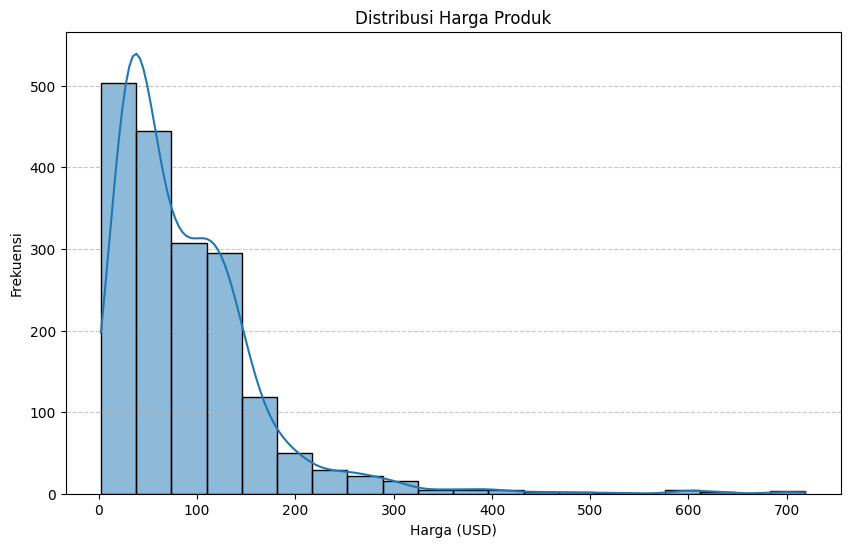

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_price_distribution(data):
    """Plot distribusi harga produk."""
    plt.figure(figsize=(10, 6))
    sns.histplot(data['price'], bins=20, kde=True)
    plt.title('Distribusi Harga Produk')
    plt.xlabel('Harga (USD)')
    plt.ylabel('Frekuensi')
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Menambahkan grid
    plt.show()

# Memanggil fungsi untuk melakukan visualisasi
plot_price_distribution(data)


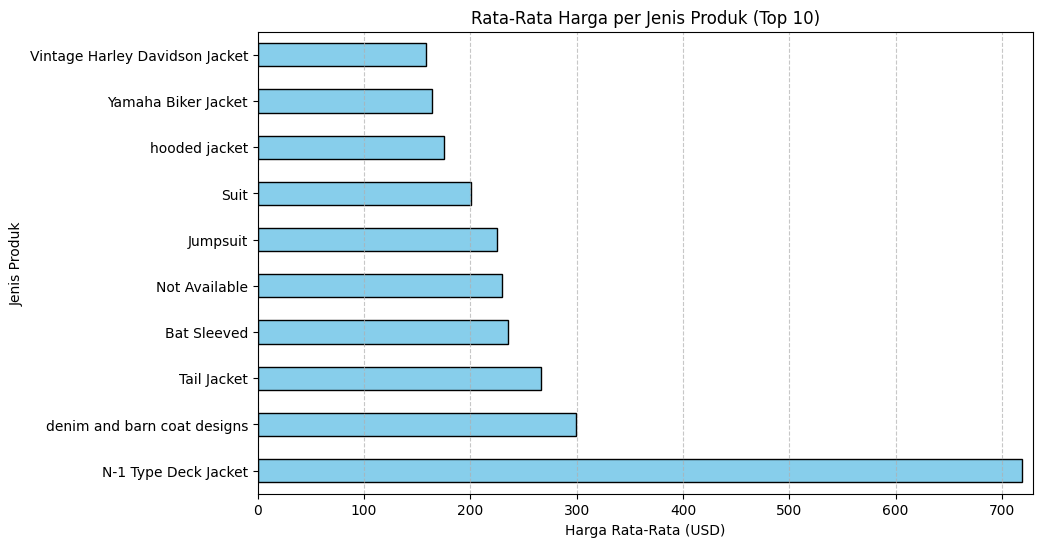

In [28]:
def plot_avg_price_per_type(data, top_n=10):
    """Plot rata-rata harga per tipe produk."""
    avg_price_per_type = data.groupby('type')['price'].mean().sort_values(ascending=False)  # Sort descending
    avg_price_per_type = avg_price_per_type.head(top_n)  # Ambil N teratas

    plt.figure(figsize=(10, 6))
    
    # Plot rata-rata harga
    avg_price_per_type.plot(kind='barh', color='skyblue', edgecolor='black')
    
    plt.title('Rata-Rata Harga per Jenis Produk (Top {})'.format(top_n))
    plt.xlabel('Harga Rata-Rata (USD)')
    plt.ylabel('Jenis Produk')
    plt.grid(axis='x', linestyle='--', alpha=0.7)  # Menambahkan grid
    
    # Mengatur batas sumbu x
    plt.xlim(0, avg_price_per_type.max() + 10)  # Menambahkan sedikit ruang di sisi kanan
    
    plt.show()

# Memanggil fungsi untuk rata-rata harga
plot_avg_price_per_type(data, top_n=10)  # Hanya menampilkan 10 jenis produk teratas


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
import pandas as pd
import numpy as np

# Mengisi nilai kosong untuk atribut yang diperlukan
data['available_stock'] = data['available_stock'].fillna(0)
data['price'] = data['price'].fillna(data['price'].mean())

# Fitur dan target untuk model prediksi harga
X_price = pd.get_dummies(data[['type', 'available_stock', 'itemLocation']], drop_first=True)
y_price = data['price']

# Split data
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X_price, y_price, test_size=0.2, random_state=42)

# Melatih model regresi linear untuk prediksi harga
model_price = LinearRegression()
model_price.fit(X_train_price, y_train_price)

# Prediksi dan evaluasi
y_pred_price = model_price.predict(X_test_price)
mse_price = mean_squared_error(y_test_price, y_pred_price)
print("Mean Squared Error untuk Prediksi Harga:", mse_price)

# Model klasifikasi untuk prediksi ketersediaan (binary classification: tersedia atau tidak)
data['stock_available'] = np.where(data['available_stock'] > 0, 1, 0)

# Mengisi nilai kosong di atribut yang digunakan untuk model klasifikasi
X_stock = pd.get_dummies(data[['type', 'price', 'itemLocation']], drop_first=True)
y_stock = data['stock_available']

X_train_stock, X_test_stock, y_train_stock, y_test_stock = train_test_split(X_stock, y_stock, test_size=0.2, random_state=42)

# Melatih model Random Forest untuk prediksi ketersediaan
model_stock = RandomForestClassifier(random_state=42)
model_stock.fit(X_train_stock, y_train_stock)

# Prediksi dan evaluasi
y_pred_stock = model_stock.predict(X_test_stock)
accuracy_stock = accuracy_score(y_test_stock, y_pred_stock)
print("Akurasi untuk Prediksi Ketersediaan Stok:", accuracy_stock)


Mean Squared Error untuk Prediksi Harga: 6.163347379100637e+22
Akurasi untuk Prediksi Ketersediaan Stok: 0.930939226519337
